In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,295 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [2]:
!tesseract -v

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


In [3]:
!sudo apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-eng is already the newest version (4.00~git24-0e00fe6-1.2).
tesseract-ocr-eng set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [4]:
import os
import os.path
import json
import sys
import pytesseract
import re
import argparse
import csv
import dateutil.parser as dparser
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import statistics 
import numpy as np
from pytesseract import Output
 
# im = cv2.imread('/content/samplee.jpg')
# gray = 255 - cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [5]:
!pip install imutils

In [7]:
im = cv2.imread('/content/test.jpg')
d = pytesseract.image_to_data(im, output_type=Output.DICT)
h=[]
n_boxes = len(d['level'])
for i in range(n_boxes):
  (xcood, ycood, width, height) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
  cv2.rectangle(im, (xcood, ycood), (xcood+width, ycood+height), (0, 255, 0), 2)
  h.append(height)
height=(statistics.mode(h))
height=height+1
print(height)

15


In [ ]:
# cv2_imshow(im)

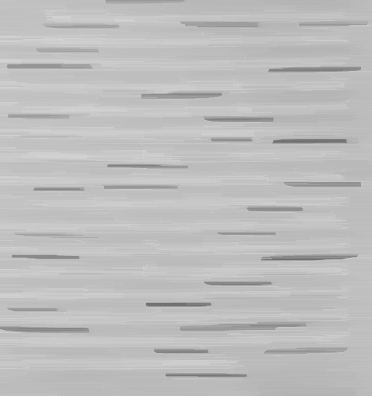

In [8]:
## Read
img = cv2.imread("/content/test.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

##Create long line kernel, and do morph-close-op
kernel = np.ones((1,40), np.uint8)
morphed = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
cv2.imwrite("line_detected.png", morphed)
cv2_imshow(morphed)

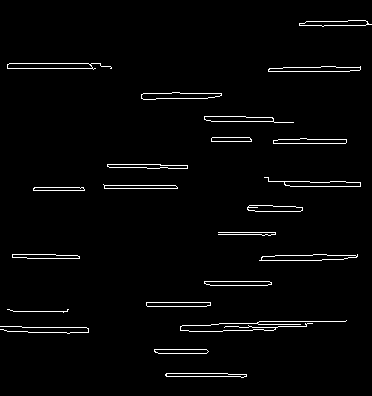

Number of Contours found = 22
line


square
circle


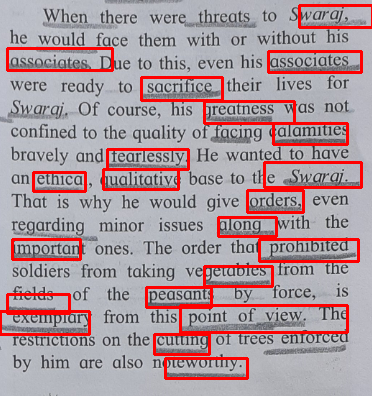

In [9]:
import imutils
import time
from google.colab.patches import cv2_imshow 
from collections import OrderedDict 
# Let's load a simple image with 3 black squares 
image = cv2.imread("line_detected.png") 
cv2.waitKey(0) 
  
# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 


# Find Canny edges 
font = cv2.FONT_HERSHEY_COMPLEX
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 
  
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
  
cv2_imshow(edged) 
cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
# cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

d=OrderedDict()
coords=[]
nuclei = [] 
l=[]
images=[]
lvalue=0
cvalue=0
svalue=0
line=[]
square=[]
circle=[]
contours = contours[::-1]
for cnt in (contours):     
      # nuclei.append(cnt)
      # print(cv2.contourArea(cnt))
      peri = cv2.arcLength(cnt, True)
      approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
      # print(len(approx))
      if (len(approx)==2):
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y-height), (x+w, y+h), (0, 0, 255), 2)
        new=img[y-height:y+h, x:x+w]
        line.append(new)
        custom_config = r' -l eng --oem 1 --psm 6  -c preserve_interword_spaces=1 -c tessedit_char_whitelist="0123456789- " '
        text = pytesseract.image_to_string(new, config=custom_config)
        # regex = re.compile(r'[\n\r\t\x0c\,]')
        # text = regex.sub("", text)
        # text = text.strip()
        text = re.sub(r"[^ a-zA-Z0-9]+", '', text)
        if text != "":
          l.append(text)
          lvalue=lvalue+1
          d["L"+str(lvalue)]=text
      elif (len(approx)==4):
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y-height), (x+w, y+h), (0, 0, 255), 2)
        new=img[y-height:y+h, x:x+w]
        square.append(new)
        text = pytesseract.image_to_string(new)
        # regex = re.compile(r'[\n\r\t\x0c\,]')
        # text = regex.sub("", text)
        # text = text.strip()
        text = re.sub(r"[ ^a-zA-Z0-9]+", '', text)
        if text != "":
          l.append(text)
          svalue=svalue+1
          d["S"+str(svalue)]=text
      else:
        x, y, w, h = cv2.boundingRect(cnt)
        # cv2.rectangle(img, (x, y-height), (x+w, y+h), (0, 0, 255), 2)
        new=img[y-height:y+h, x:x+w]
        circle.append(new)
        text = pytesseract.image_to_string(new)
        # regex = re.compile(r'[\n\r\t\x0c\,]')
        # text = regex.sub("", text)
        # text = text.strip()
        text = re.sub(r"[^ a-zA-Z0-9]+", '', text)
        if text != "":
          l.append(text)
          cvalue=cvalue+1
          d["C"+str(cvalue)]=text
print("line")
for i in range(len(line)-1,-1,-1):
  cv2_imshow(line[i])
print("square")
for i in range(len(square)-1,-1,-1):
  cv2_imshow(square[i])
print("circle")
for i in range(len(circle)-1,-1,-1):
  cv2_imshow(circle[i])
cv2_imshow(img)

In [10]:
l=[x.strip() for x in l] # extra spaces rm
l=[re.sub(r"[^ a-zA-Z0-9]+", '', k) for k in l] #remove spl chars
l=[x for x in l if x] # non empty
print(l)

['war', 'issociates', 'sacrifice', 'yreatness V', 'facin', 'alamiue', 'hualitativ', 'ethica', 'orders', 'mportan', 'ee al', 'point of view Ih', 'CULTITG', 'ae cnn el']


In [11]:
print(d)

OrderedDict([('L1', 'war'), ('L2', 'issociates'), ('L3', 'sacrifice'), ('L4', 'yreatness V'), ('C1', 'facin'), ('L5', 'alamiue'), ('L6', 'hualitativ'), ('L7', 'ethica'), ('L8', 'orders'), ('L9', 'mportan'), ('L10', 'ee al'), ('L11', 'point of view Ih'), ('L12', 'CULTITG'), ('L13', 'ae cnn el')])


In [12]:
print(len(l))
print(len(d.keys()))

14
14


In [13]:
!pip install autocorrect

     |████████████████████████████████| 624kB 3.2MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.2.2-cp36-none-any.whl size=621491 sha256=8e918ad108d47f01d8ac714db18ff6ca2ed152827adbe42cb3c27a9c7ca1e878
  Stored in directory: /root/.cache/pip/wheels/b4/0b/7d/98268d64c8697425f712c897265394486542141bbe4de319d6
Successfully built autocorrect


In [14]:
from autocorrect import Speller
spell = Speller()
for i in l:
  print(spell(i), i)

war war
associates issociates
sacrifice sacrifice
greatness V yreatness V
facing facin
alamiue alamiue
qualitative hualitativ
ethics ethica
orders orders
important mportan
ee al ee al
point of view I point of view Ih
CULTITG CULTITG
ae cnn el ae cnn el
